In [60]:
import sys
sys.path.insert(0, "/Users/jasperhoffmann/projects/robin-thesis")

import numpy as np
from envs.robots.ccd import IK
from supervised.train import forward_kinematics
import matplotlib.pyplot as plt



(100, 3)
(100, 2)


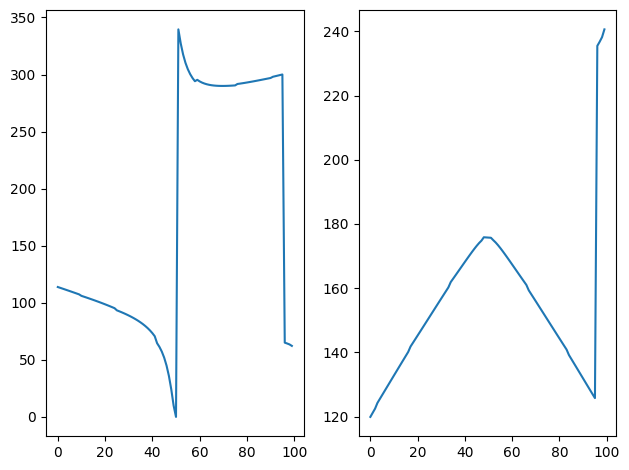

In [67]:
np.random.seed(0)


def create_line_data():
    link = np.ones(2)

    # create line in 2pi box
    start = np.array([-np.pi, np.random.uniform(-np.pi, np.pi)])
    end = np.array([np.pi, np.random.uniform(-np.pi, np.pi)])
    angles = np.linspace(start, end, 100)

    # create target line
    start = np.array([-1., np.random.uniform(-0.5, 0.5), 0])
    end = np.array([1., np.random.uniform(-0.5, 0.5), 0])
    targets = np.linspace(start, end, 100)
    # targets = targets[1].repeat(100)

    # solve with ik
    print(targets.shape)
    print(angles.shape)
    return angles, np.stack([IK(target, angle, link, err_min=0.01)[0] for angle, target in zip(angles, targets)])


start_angles, sol_angles = create_line_data()

fig, axes = plt.subplots(1, 2, tight_layout=True)
axes = axes.flatten()

axes[0].plot(sol_angles[:, 0])
axes[1].plot(sol_angles[:, 1])


(100, 3)
(100, 2)


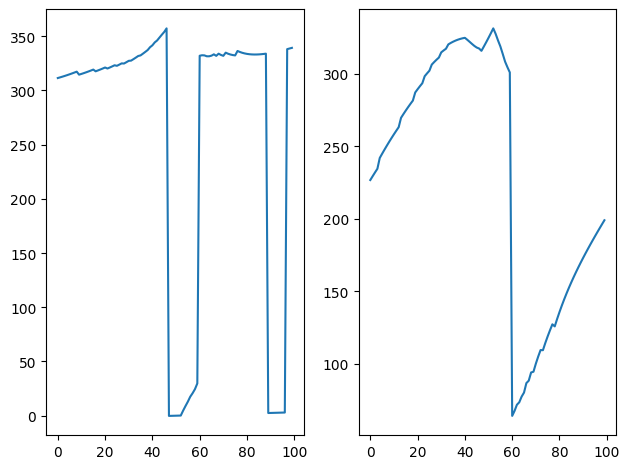

In [87]:
import torch


def create_line_data():
    link = np.ones(2)

    # create line in 2pi box
    start = np.array([-np.pi, np.random.uniform(-np.pi, np.pi)])
    end = np.array([np.pi, np.random.uniform(-np.pi, np.pi)])
    angles = np.linspace(start, end, 100)

    # create delta line
    t = np.linspace(-np.pi, np.pi, 100)
    delta = np.stack([np.sin(t), np.cos(t)]).T * 0.0

    # calculate target positions
    targets = np.zeros((100, 3))
    targets[:, :2] = forward_kinematics(torch.tensor(angles)).numpy()[:, -1] + delta
    print(targets.shape)
    print(angles.shape)

    # solve with ik
    return angles, np.stack([IK(target, angle, link, err_min=0.001)[0] for angle, target in zip(angles.copy(), targets)])


start_angles, sol_angles = create_line_data()

fig, axes = plt.subplots(1, 2, tight_layout=True)
axes = axes.flatten()

axes[0].plot(sol_angles[:, 0])
axes[1].plot(sol_angles[:, 1])

In [80]:
start_angles.shape

(100, 2)